# KNeighborsClassifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('A.csv')
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df=data.dropna()
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [4]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [5]:
df.rename({'M/F':'MF'}, axis=1)

,Group,MF,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [6]:
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [7]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Group','M/F']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [9]:
x = df.drop(labels='Group', axis=1)
y = df.loc[:,'Group']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  283
Number of test dataset     :  71
Total number of dataset    :  354


In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [12]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
predicted = KNN.predict(x_test)

In [13]:
cr = classification_report(y_test,predicted)
print('Classification report of KNeighborsClassifier Result is:\n',cr)
print("\n")

Classification report of KNeighborsClassifier Result is:
               precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.58      0.54      0.56        26
           2       0.68      0.71      0.69        38

    accuracy                           0.62        71
   macro avg       0.56      0.56      0.56        71
weighted avg       0.62      0.62      0.62        71





In [14]:
cm = confusion_matrix(y_test,predicted)
print('Confusion Matrix result of KNeighborsClassifier is:\n',cm)
print("\n")

Confusion Matrix result of KNeighborsClassifier is:
 [[ 3  2  2]
 [ 1 14 11]
 [ 3  8 27]]




In [15]:
accuracy = cross_val_score(KNN, x, y, scoring='accuracy')
print('Cross validation test results of accuracy:', accuracy)
print("\n")

Cross validation test results of accuracy: [0.54929577 0.56338028 0.49295775 0.43661972 0.51428571]




In [16]:
a = accuracy_score(y_test,predicted)
print("Accuracy Result of KNeighborsClassifier is:",a*100)

Accuracy Result of KNeighborsClassifier is: 61.97183098591549


Confusion matrix-KNeighborsClassifier:
[[ 3  2  2]
 [ 1 14 11]
 [ 3  8 27]]


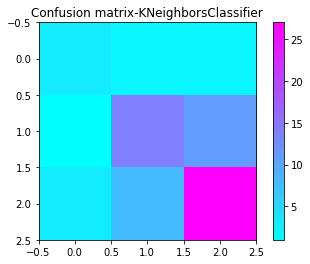

In [17]:
def plot_confusion_matrix(cm, title='Confusion matrix-KNeighborsClassifier', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('Confusion matrix-KNeighborsClassifier:')
print(cm)
plot_confusion_matrix(cm)

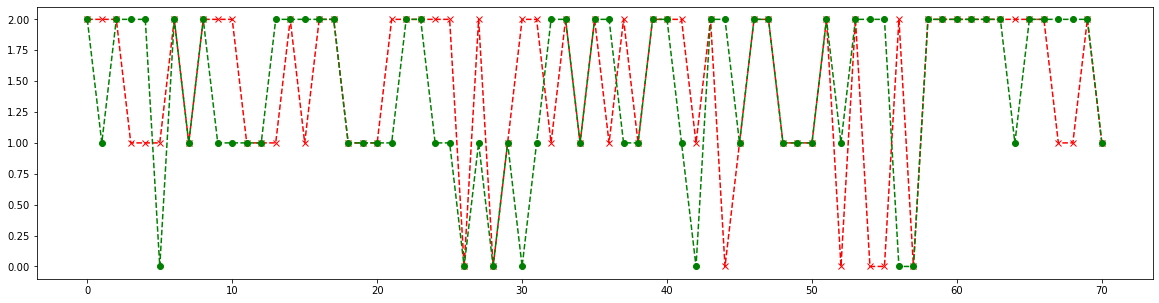

In [18]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()